# Evaluating the model

### Introduction 

Now that we have learned about fitting a model, let's see how we can tell if our model is any good.

In [1]:
import pandas as pd
df = pd.read_csv('./imdb_movies.csv')

In [8]:
df[['budget', 'revenue']][:3]

,budget,revenue
0,237000000,2787965087
1,300000000,961000000
2,245000000,880674609


In [2]:
X = df[['budget']]
y =  df['revenue']

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

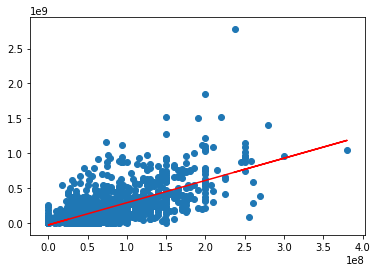

In [6]:
import matplotlib.pyplot as plt 
x = df['budget']
y = df['revenue']
plt.plot(x, predictions, color = 'red')
plt.scatter(x, y)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()

In [17]:
y.to_numpy().shape

(2000,)

In [18]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
predictions = model.predict(X)
predictions


array([7.27303380e+08, 9.28172166e+08, 7.52810527e+08, ...,
       4.49871865e+07, 4.49871865e+07, 5.13639733e+07])

mean squared error $\frac{1}{m}\sum (y_i - \hat{y})^2$

root mean squared error  = $\sqrt{\frac{1}{m}\sum (y_i - \hat{y})^2}$

In [28]:
import numpy as np
RSS = np.sum((y - predictions)**2)

In [34]:
RSS

5.08570288342036e+19

In [35]:
mean_squared_error = RSS/y.shape[0]
mean_squared_error

2.54285144171018e+16

In [36]:
np.sqrt(mean_squared_error)

159463207.09524754

In [42]:
from sklearn.metrics import mean_squared_error

In [46]:
np.sqrt(mean_squared_error(y, predictions))

159463207.09524754

#### R squared 

Coefficient of determination

In [51]:
TSS = np.sum((y - df['revenue'].mean())**2)

9.559548134397162e+19

In [54]:
TSS = df.shape[0]*df['revenue'].var()

In [56]:
coeficient_of_determination = 1 - RSS/TSS 

0.4682635663825486

In [ ]:
1 - 30/20 = -.5

In [ ]:
> How much of an improvement is your model over the just predicting the mean.

In [ ]:
variance = 1\n (x_i - \hat{x})^2

* Total sum of squares - sum of the deviations from the mean.

In [ ]:
RSS/

### Squared Error

The most obvious way to evaluate our model is by looking to our cost function.  Remember how we defined our cost function:

$J = \sum_{i=1}^m (y_i - \hat{y_i})^2$

This is our residual sum of squares.  For every observation, we calculate actual minus expected, square the value, and then sum the differences.  

One thing that might be useful is to get a sense of the average error of each data point.  Well to get there, we can use the following formula:

$\sqrt{\frac{1}{m}\sum_{i=1}^m (y_i - \hat{y_i})^2}$

So we divided by the size of our dataset to get to the average squared error, and then we took the square root to undo the effect of squaring the residuals.  This is called the root mean squared error.

$RMSE = \sqrt{\frac{1}{m}\sum_{i=1}^m (y_i - \hat{y_i})^2}$

We can use sklearn to help us with the calculation.

In [22]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, predictions)

2.54285144171018e+16

Then we just take the square root.

In [23]:
import numpy as np
np.sqrt(mean_squared_error(y, predictions))

159463207.09524754

The root mean squared error gives us a sense of the average error for each observation.    This can be helpful.  If we make a single prediction, we would want to get a sense of how accurate we expect the prediction to be.

But one issue with the root mean squared error is the values of the target, the larger our error.  For example, if we looking we are predicting ticket sales of a single movie theater we would expect a smaller RMSE than predicting ticket sales of a movie theater chain.   

### The Coefficient of Determination

The coefficient of determination, or $r^2$ by contrast does not depend on the units of the domain.

> The coefficient of determination is proportion of the variance in our target variable that is explained by our model.

Let's explain by way of example.

The coefficient of determination evaluates our model with the following logic.  It first asks, what if we didn't bother using a machine learning model, but instead just predicted our target with the mean.  How much better does our model do in predicting our target variables than the mean.

Ok, so answer this question, we first can see how the sum of the squared errors if we predicted each target just by using the mean.

In [14]:
import numpy as np
TSS = np.sum((y - y.mean())**2)
TSS

9.559548134397162e+19

This number is called the **total sum of squares**.  

> It is proportional to the variance in the data.

The next step is to calculate the RSS of our model.

In [12]:
RSS = np.sum((y - predictions)**2)
RSS

5.08570288342036e+19

Then we divide the two.

In [15]:
RSS/TSS

0.5320024348348628

Now if you look at the above formula, the larger the RSS relative to the TSS, the better the score.  We don't want that, so the last step is to calculate $1 - RSS/TSS$.

In [18]:
r_2 = 1 - RSS/TSS
r_2

0.46799756516513724

In [20]:
model.score(X, y)

0.4679975651651373

This is called the residual sum of squares.  It is 1 - the residual sum of squares relative to the total sum of squares.

### Summary

In this lesson we learned about the two main ways to evaluate a regression model.  The first is root mean squared error, which allows us to get a sense of the average deviation of our prediction versus the observed target value.  The second is the coefficient of determination, also known as $r^2$, which tells us how much of the variance in our target variable that is explained by our model, relative to just predicting the mean of the target.